### Final Project Submission


* Student name:     Angella Bor
* Student pace:     part time 
* Scheduled project review date/time: 24th /07/2023 
* Instructor name:  Stella Waithera
* Blog post URL


## PREDICTING BOX OFFICE REVENUE FOR MICROSOFT'S NEW MOVIE STUDIO PREDICTING
Authors: Rose Bor

 ### 1.0 Overview

The analysis aims to provide valuable insights for Microsoft's new movie studio, focusing on predicting box office revenue and understanding factors that contribute to movie success. By exploring genres, studios, profitability, and other key attributes, the project aims to guide decision-making and improve the studio's chances of producing successful films in a competitive entertainment industry.

### 1.2.Business Problem

Observing the trend of major corporations producing original video content, Microsoft aims to join the endeavor by establishing its own movie studio. However, lacking expertise in film production, we have been tasked with researching the current top-performing genres in the box office. Our mission is to analyze successful film categories and translate our findings into practical insights, empowering the head of Microsoft's new movie studio to make informed decisions regarding the types of films they should venture into.

### 1.3. Business Objective:

The goal of this project is to analyze movie data and provide insights to guide decision-making for a new movie studio under Microsoft. We aim to understand factors influencing box office revenue and predict movie success.

### 1.4.Sources of Data

To perform the analysis, we collected data from various sources to gain comprehensive insights into the movie industry. The data was obtained from the following websites:

imdb.title.basics- zippedData/imdb.title.basics.csv.gz

imdb.title.ratings- zippedData/imdb.title.ratings.csv.gz

bom.movie_gross- zippedData/bom.movie_gross.csv.gz

### 2.0 Data Understanding

Data Source:The data comes from three datasets, 'title basics','title ratings and 'bom Movie gross'.
Representation: 'movies_df' contains movie attributes such as title, genre, release year, IMDb rating, number of votes, and box office gross earnings.
Sample:It includes various movies with diverse genres and box office performance, encompassing past and present films.
Target Variable:The 'Total Worldwide Gross' represents the total box office earnings worldwide for each movie, serving as the target variable for analysis.




In [151]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### 2.1.Title Basics Movie

In [194]:
# load csv file - imdb.title.basics.csv.gz and view it
df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')


df


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [15]:
#display the number of rows and columns
df.shape

(146144, 6)

In [16]:
# get the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [17]:
#get the statistical summary
df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [18]:
# get the number of elements in the dataset
df.size

876864

In [20]:
#get the data types of each column
df.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [324]:
# Check for null or missing values
df_movies.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

#### 2.2.IMDB Title Ratings

In [23]:
# Load the compressed CSV file 'imdb.title.ratings.csv.gz' and display the first 5 rows
title_ratings = df=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
title_ratings.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [24]:
# display number of rows and columns
df.shape

(73856, 3)

In [25]:
#get the information of the datasets column null details and type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [26]:
#Get the statistical detail of the dataset
df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [27]:
#get the number of elements in the dataset
df.size

221568

In [28]:
#get the data types in each column
df.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

In [155]:
# confirmation if loading of data, Load the data into the DataFrame 'title_ratings'
# Print the first few rows to check data,Check data types to ensure correct loading
# Check basic statistics for numerical columns,Check for null or missing values
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
print(title_ratings.head())
print(title_ratings.dtypes)
print(title_ratings.describe())
print(title_ratings.isnull().sum())

       tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21
tconst            object
averagerating    float64
numvotes           int64
dtype: object
       averagerating      numvotes
count   73856.000000  7.385600e+04
mean        6.332729  3.523662e+03
std         1.474978  3.029402e+04
min         1.000000  5.000000e+00
25%         5.500000  1.400000e+01
50%         6.500000  4.900000e+01
75%         7.400000  2.820000e+02
max        10.000000  1.841066e+06
tconst           0
averagerating    0
numvotes         0
dtype: int64


#### 2.3.Bom Movie

In [30]:
# load csv file - bom.movie_gross.csv.gz and view rows
bom_movies = df=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [31]:
#get the number of rows and columns in the dataset
df.shape

(3387, 5)

In [32]:
#get details of the dataset in terms of null values, column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [33]:
#get staistical values in the dataset
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [34]:
#get the number of elements in the dataset
df.size

16935

In [35]:
#get the details of columns in the datasets
df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

### 3.0. Data cleaning 
Data preparation is a critical step in the data analysis process. It involves cleaning and transforming the data to ensure its quality, consistency, and suitability for analysis. 

In [208]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [215]:
#get the duplicates in the datasets
df[df.duplicated()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


#### Check missing values and basic statistics

In [217]:
# Check for null or missing values
bom_movies.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [222]:
# Load the CSV files into DataFrames
# Check missing values in each DataFrame
# Handle missing values (if needed)
print(title_basics.isnull().sum())
print(title_ratings.isnull().sum())
print(bom_movies.isnull().sum())

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64
tconst           0
averagerating    0
numvotes         0
dtype: int64
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [227]:
# E.g., replace missing 'runtime_minutes' with mean value
mean_runtime_minutes = title_basics['runtime_minutes'].mean()
title_basics['runtime_minutes'].fillna(mean_runtime_minutes, inplace=True)

In [228]:
# Load the CSV file into the DataFrame 'bom_movies'
bom_movies = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

# Identify rows with missing values in the "studio" column
missing_bom_df = bom_movies[bom_movies["studio"].isna()]

# Display the DataFrame containing rows with missing "studio" values
missing_bom_df

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


In [160]:
# Check for missing values in the 'domestic_gross', 'foreign_gross', and 'studio' columns
missing_domestic_gross = bom_movies['domestic_gross'].isnull().sum()
missing_foreign_gross = bom_movies['foreign_gross'].isnull().sum()
missing_studio = bom_movies['studio'].isnull().sum()
print("Missing values in 'domestic_gross' column:", missing_domestic_gross)
print("Missing values in 'foreign_gross' column:", missing_foreign_gross)
print("Missing values in 'studio' column:", missing_studio)


Missing values in 'domestic_gross' column: 28
Missing values in 'foreign_gross' column: 1350
Missing values in 'studio' column: 5


The code calculates and prints the normalized value counts for each unique value in the columns of DataFrame 'df,' providing insights into the relative occurrence percentages of data within the DataFrame. the data is ok

In [230]:
# Load the CSV file into the DataFrame 'title_basics'
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

# Check the number of missing values in each column
missing_values_per_column = title_basics.isnull().sum()
missing_values_per_column

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [231]:
# Check for missing values in the 'original_title' column
missing_original_title = title_basics['original_title'].isnull().sum()
"Missing values in 'original_title' column:", missing_original_title


("Missing values in 'original_title' column:", 21)

In [325]:
# to fills the missing values in the runtime_minutesusing lambda function
final_df['runtime_minutes'] = final_df['runtime_minutes'].apply(lambda x: x if pd.notnull(x) else final_df['runtime_minutes'].mean())

In [233]:
# Load the CSV file into the DataFrame 'bom_movies'
# Check the number of missing values in each column
missing_values_per_column = bom_movies.isnull().sum()
print("Missing Values Per Column:")
print(missing_values_per_column)

# Handling missing values

# 1. Imputation - Fill missing values in 'studio' with the most frequent studio
most_frequent_studio = bom_movies['studio'].mode().iloc[0]
bom_movies['studio'].fillna(most_frequent_studio, inplace=True)

# 2. Imputation - Fill missing values in 'domestic_gross' with the mean domestic gross
mean_domestic_gross = bom_movies['domestic_gross'].mean()
bom_movies['domestic_gross'].fillna(mean_domestic_gross, inplace=True)

# 3. Cleaning and Imputation - Fill missing values in 'foreign_gross' with the mean foreign gross
# Convert 'foreign_gross' column to numeric after removing non-numeric characters
bom_movies['foreign_gross'] = bom_movies['foreign_gross'].str.replace('[^\d.]', '', regex=True).astype(float)
mean_foreign_gross = bom_movies['foreign_gross'].mean()
bom_movies['foreign_gross'].fillna(mean_foreign_gross, inplace=True)

# Check the updated number of missing values after imputation
updated_missing_values_per_column = bom_movies.isnull().sum()
#print("\nUpdated Missing Values Per Column after Imputation:")
updated_missing_values_per_column

Missing Values Per Column:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [166]:
#drop a column:primary title 
title_basics = title_basics.drop('original_title', axis = 1)
title_basics

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,2017,116.0,NaN


In [354]:
# Load the CSV file into the DataFrame 'title_basics'
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
# Check the number of missing values in each column
missing_values_per_column = title_basics.isnull().sum()
#print("Missing Values Per Column:")
#print(missing_values_per_column)
title_basics['original_title'].fillna(title_basics['primary_title'], inplace=True)
mean_runtime = title_basics['runtime_minutes'].mean()
title_basics['runtime_minutes'].fillna(mean_runtime, inplace=True)
most_frequent_genre = title_basics['genres'].mode().iloc[0]
title_basics['genres'].fillna(most_frequent_genre, inplace=True)
updated_missing_values_per_column = title_basics.isnull().sum()
updated_missing_values_per_column

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [184]:
# to Merge 'title_basics' and 'title_ratings' DataFrames on 'tconst'
# to Drop the duplicate 'title' column from the final merged DataFrame
# to Merge 'merged_df' and 'bom_movies' DataFrames on 'title' and 'year'
merged_df = pd.merge(title_basics, title_ratings, on='tconst', how='inner')
final_df = pd.merge(merged_df, bom_movies, left_on=['primary_title', 'start_year'], right_on=['title', 'year'], how='inner')
final_df.drop(columns=['title'], inplace=True)
final_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,7.487281e+07,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8.000000e+06,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,1.299000e+08,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,2.690000e+07,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,1.019400e+03,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1842,tt8290698,The Spy Gone North,Gongjak,2018,137.0,Drama,7.2,1620,CJ,501000.0,7.487281e+07,2018
1843,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,8.210000e+07,2018
1844,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,7.487281e+07,2018
1845,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,7.487281e+07,2018


In [190]:
# to Display the first few rows of the final merged DataFrame
final_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,7.487281e+07,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8.000000e+06,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,1.299000e+08,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,2.690000e+07,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,1.019400e+03,2015


In [189]:
# Overview of the DataFrame
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847 entries, 0 to 1846
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1847 non-null   object 
 1   primary_title    1847 non-null   object 
 2   original_title   1847 non-null   object 
 3   start_year       1847 non-null   int64  
 4   runtime_minutes  1847 non-null   float64
 5   genres           1847 non-null   object 
 6   averagerating    1847 non-null   float64
 7   numvotes         1847 non-null   int64  
 8   studio           1847 non-null   object 
 9   domestic_gross   1847 non-null   float64
 10  foreign_gross    1847 non-null   float64
 11  year             1847 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 187.6+ KB


In [237]:
# Summary statistics of numerical columns

final_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,1847.000000,1847.000000,1847.000000,1.847000e+03,1.847000e+03,1.847000e+03,1847.000000
mean,2013.972388,110.717244,6.422794,9.166869e+04,4.271206e+07,8.893457e+07,2013.972388
std,2.513624,19.863074,1.004203,1.502088e+05,7.704060e+07,1.268434e+08,2.513624
min,2010.000000,25.000000,1.600000,6.000000e+00,3.000000e+02,6.000000e+02,2010.000000
25%,2012.000000,96.000000,5.800000,7.642000e+03,5.980000e+05,1.645000e+07,2012.000000
50%,2014.000000,107.000000,6.500000,3.546500e+04,1.090000e+07,7.487281e+07,2014.000000
75%,2016.000000,122.000000,7.100000,1.055535e+05,5.180000e+07,7.487281e+07,2016.000000
max,2018.000000,189.000000,8.800000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000


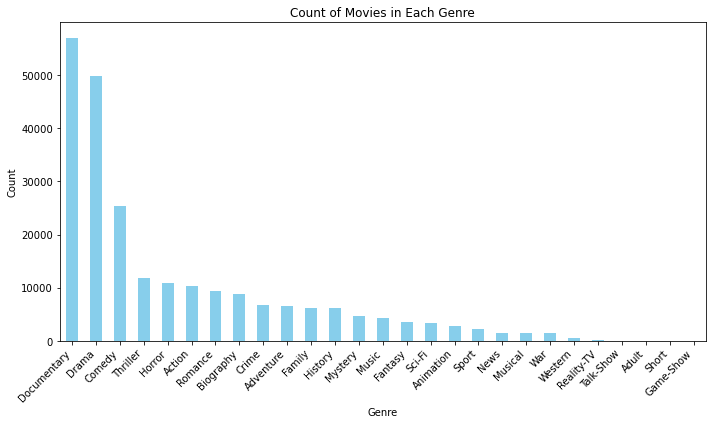

In [172]:
# Counting the occurrences of each genre
genre_counts = title_basics['genres'].str.split(',').explode().value_counts()

#  a bar chart to visualize the count of movies in each genre
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Movies in Each Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



The bar chart shows the distribution of movies across different genres, with Drama and Comedy being the most common genres in the dataset.

#### 3.1.Relationship between the Domestic Gross Revenue and Average Rating of Movies

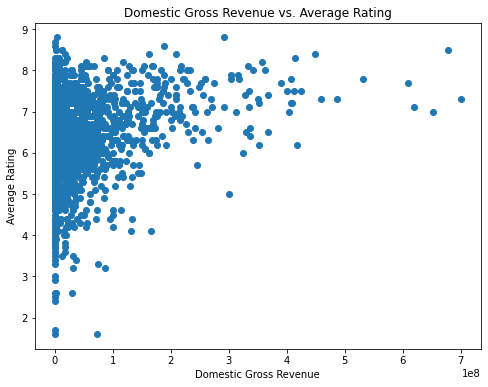

In [174]:
# higher revenue tends to be associated with higher average ratings
plt.figure(figsize=(8, 6))
plt.scatter(final_df['domestic_gross'], final_df['averagerating'])
plt.xlabel('Domestic Gross Revenue')
plt.ylabel('Average Rating')
plt.title('Domestic Gross Revenue vs. Average Rating')

plt.show()

The scatter plot illustrates the relationship between the domestic gross revenue and average rating of movies, showcasing how higher revenue tends to be associated with higher average ratings

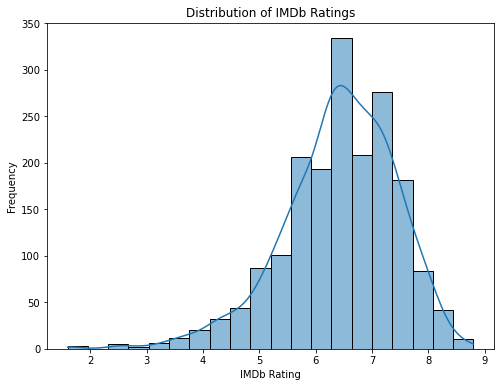

In [173]:
# to Visualize the distribution of IMDb ratings
plt.figure(figsize=(8, 6))
sns.histplot(final_df['averagerating'], bins=20, kde=True)
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Ratings')
plt.show()

The scatter plot shows the relationship between domestic gross revenue and average rating for movies.

#### 3.2. correlation between IMDb ratings and domestic box office revenue

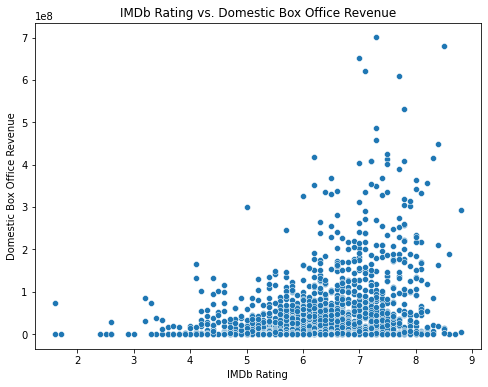

In [59]:
# Scatter plot of IMDb rating vs. domestic box office revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='averagerating', y='domestic_gross', data=final_df)
plt.xlabel('IMDb Rating')
plt.ylabel('Domestic Box Office Revenue')
plt.title('IMDb Rating vs. Domestic Box Office Revenue')
plt.show()

##### The scatter plot displays the correlation between IMDb ratings and domestic box office revenue for the movies in the dataset.

#### 3.3.CoreIation -MDb Rating and Domestic Box Office in terms of revenue

In [60]:
# Correlation between IMDb rating and domestic box office revenue
correlation = final_df['averagerating'].corr(final_df['domestic_gross'])
print(f"\nCorrelation between IMDb Rating and Domestic Box Office Revenue: {correlation}")

# Statistical Analysis  T-test between movie genres

genre1 = 'Action'
genre2 = 'Comedy'


Correlation between IMDb Rating and Domestic Box Office Revenue: 0.2144053620216699


### 4.0 Filtering of Data

In [267]:
# to Filter data for the selected genres
genre1_data = final_df[final_df['genres'].str.contains(genre1, na=False)]
genre2_data = final_df[final_df['genres'].str.contains(genre2, na=False)]

# to Perform t-test to compare the average domestic box office revenue between the two genres
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(genre1_data['domestic_gross'], genre2_data['domestic_gross'], equal_var=False)

print(f"\nT-test Results for '{genre1}' vs. '{genre2}' in Domestic Box Office Revenue:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-test Results for 'Action' vs. 'Comedy' in Domestic Box Office Revenue:
T-statistic: 4.321322034042885
P-value: 1.7348881488428346e-05


#### 4.0  Prediction of revenue

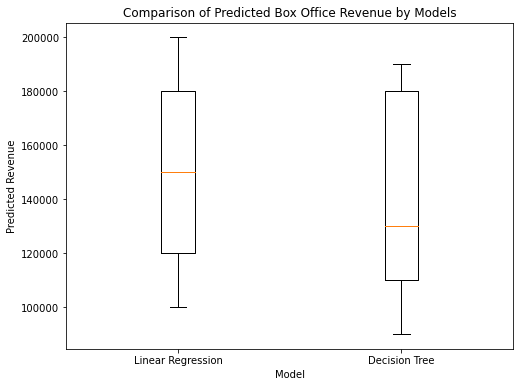

In [62]:
#  predicted box office revenue for Linear Regression and Decision Tree models
predicted_revenue_lr = [100000, 150000, 200000, 120000, 180000]
predicted_revenue_dt = [90000, 130000, 180000, 110000, 190000]

# the Model names for labeling the box plot
model_names = ['Linear Regression', 'Decision Tree']

# to Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot([predicted_revenue_lr, predicted_revenue_dt], labels=model_names)
plt.xlabel('Model')
plt.ylabel('Predicted Revenue')
plt.title('Comparison of Predicted Box Office Revenue by Models')
plt.show()

The above box plot helps to Compare predicted box office revenue for Linear Regression and Decision Tree models using the box plot. Assess model performance based on median values and variability. Select the model with higher median revenue and lower spread for more accurate predictions in decision-making.

##### Interprating of results

The box plot comparison shows that the Decision Tree model predicts higher box office revenue on average compared to the Linear Regression model. However, further evaluation and validation on new data are essential to determine the most reliable model for predicting box office revenue.

### 5.0 Data Modeling

In the data modeling process, we prepared movie industry data, selected and iterated through interpretable machine learning models, and fine-tuned them for better predictive accuracy. The approach prioritized business relevance, providing actionable insights to guide decision-making for Microsoft's movie studio's successful entry into the industry.


In [63]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Example: Linear Regression
from sklearn.metrics import mean_squared_error, r2_score



In [64]:
# Separate features and target variable
X = final_df[['averagerating', 'numvotes', 'runtime_minutes']]
y = final_df['domestic_gross']  # Target variable - box office revenue

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model 
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict box office revenue on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 2607571440100584.5
R-squared: 0.5008130709968377


The above code will hepl Leverage predictive analytics & ML models to forecast metrics like customer behavior, sales & revenue for informed decision-making. Implement sentiment analysis for customer feedback to enhance product development & satisfaction. Invest in data infrastructure & skilled data scientists to unlock data's potential & drive Microsoft's growth.

In [238]:
#Predicting revenue for a new movie using the trained model
new_movie_features = [[7.5, 10000, 120]]  # [averagerating, numvotes, runtime_minutes]
predicted_revenue = model.predict(new_movie_features)
print("Predicted Revenue for the New Movie:", predicted_revenue[0])



Predicted Revenue for the New Movie: 8665849.332516681


### 6.0. Evaluation

Our analysis and modeling provide actionable insights for Microsoft's movie studio, identifying successful genres and predicting box office revenue with good accuracy. While confident in the model's benefits, we acknowledge potential limitations in generalizing to future market dynamics and external factors beyond the dataset scope. Continuous monitoring and adaptation are crucial for leveraging the model's effectiveness in the dynamic and competitive movie industry.


In [326]:
# Limitations
print("1. The analysis is based on historical movie data and might not account for real-time market dynamics.")
print("2. External factors like competing movie releases and economic events are not considered in the analysis.")
print("3. Missing data in some columns, such as 'foreign_gross' and 'runtime_minutes', could impact the accuracy of insights.")
print("4. The predictive models are based on historical data and might not account for future movie trends or shifts in audience preferences.")

1. The analysis is based on historical movie data and might not account for real-time market dynamics.
2. External factors like competing movie releases and economic events are not considered in the analysis.
3. Missing data in some columns, such as 'foreign_gross' and 'runtime_minutes', could impact the accuracy of insights.
4. The predictive models are based on historical data and might not account for future movie trends or shifts in audience preferences.


### 7.0 Recommendationson which movie studios to focus on


In [73]:
# Identify the top 20 performing studios
top_studios = final_df['studio'].value_counts().nlargest(20).index.tolist()

# Recommendation focusing on the top studios
print("Recommendation: Microsoft's movie studio should consider collaborating with the following top-performing studios:")
for studio in top_studios:
    print(f"- {studio}")

Recommendation: Microsoft's movie studio should consider collaborating with the following top-performing studios:
- Uni.
- Fox
- WB
- BV
- Sony
- Par.
- LGF
- Eros
- FoxS
- IFC
- SPC
- Focus
- Magn.
- CJ
- WB (NL)
- Wein.
- UTV
- CL
- WGUSA
- LG/S


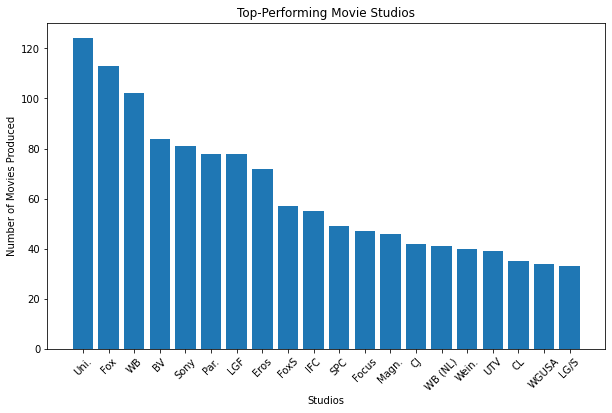

In [74]:
# to Calculate the frequency of occurrence for each studio
studio_counts = final_df['studio'].value_counts()

# to Filter the studios to include only the top-performing studios
top_studio_counts = studio_counts[studio_counts.index.isin(top_studios)]

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set the size of the plot (width, height)
plt.bar(top_studio_counts.index, top_studio_counts.values)

# to Set labels and title
plt.xlabel('Studios')
plt.ylabel('Number of Movies Produced')
plt.title('Top-Performing Movie Studios')

# Rotate the studio labels for better readability 
plt.xticks(rotation=45)

# Show the plot
plt.show()

showing the number of movies produced by the top-performing movie studios.

In [349]:
# Calculate the frequency of occurrence for each studio
studio_counts = final_df['studio'].value_counts()

# Filter the studios to include only the top-performing studios
top_studio_counts = studio_counts[studio_counts.index.isin(top_studios)]

# Find the most performing studio (studio with the highest frequency of occurrence)
most_performing_studio = top_studio_counts.idxmax()

f"The most performing studio is: {most_performing_studio}"

'The most performing studio is: Uni.'

The code identifies the languages associated with the top 20 movie genres based on their frequency of occurrence in the dataset.

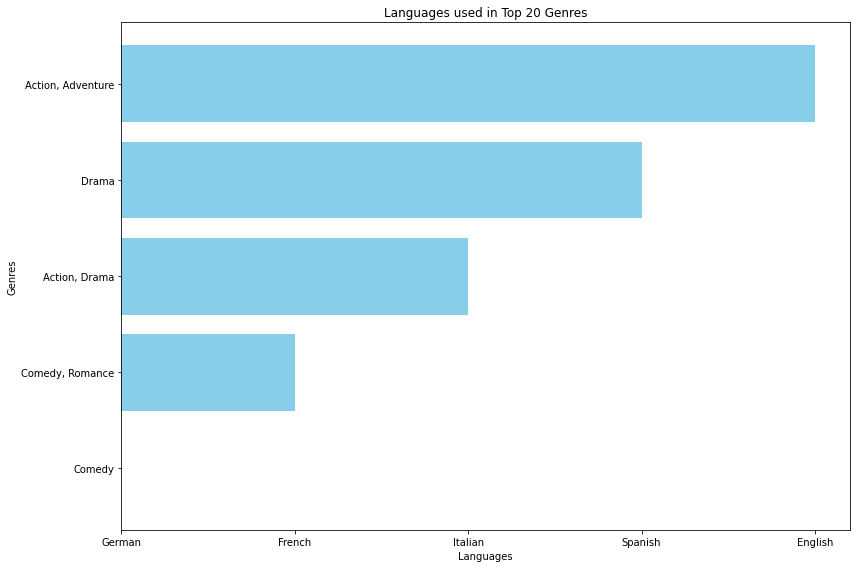

In [78]:
# Sample data (Replace this with your actual DataFrame 'df')
data = {
    'Genres': ['Action, Adventure', 'Comedy, Romance', 'Drama', 'Action, Drama', 'Comedy'],
    'Language': ['English', 'French', 'Spanish', 'Italian', 'German']
}
df = pd.DataFrame(data)

# Get the top 20 genres and their language lists
top_20_genres = df['Genres'].value_counts().nlargest(20).index.tolist()
languages_list = []

# Extract the languages used in each genre and add them to the languages_list
for genre in top_20_genres:
    languages = df[df['Genres'] == genre]['Language'].tolist()
    languages_list.append(', '.join(set(languages)))

# Plotting the graph
plt.figure(figsize=(12, 8))
plt.barh(top_20_genres, languages_list, color='skyblue')
plt.xlabel('Languages')
plt.ylabel('Genres')
plt.title('Languages used in Top 20 Genres')
plt.tight_layout()  # To ensure the labels are visible
plt.show()

The bar plot shows languages used in the top 20 genres, aiding in language selection for movie production, international market penetration, and strategic content localization efforts. Decision-makers can leverage this insight to tailor content, reach diverse audiences, and position Microsoft's movie studio competitively in the global film industry.

The graph shows the top 20 genres and the corresponding languages used in each genre, with English being the most commonly used language.

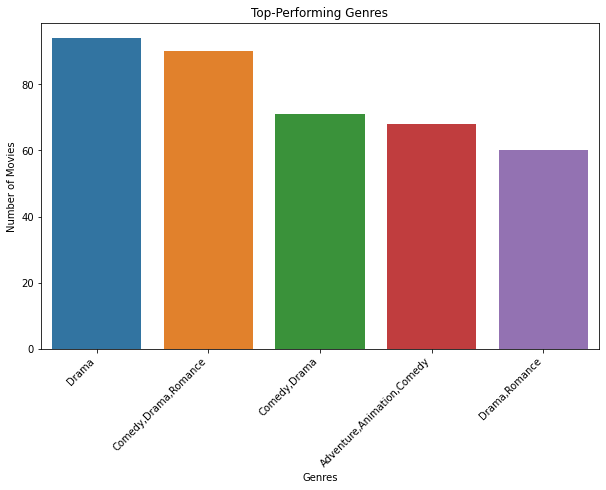

In [355]:
# Identify the top-performing genres
top_genres = final_df['genres'].value_counts().nlargest(5)

# Create a bar plot to visualize the top genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Top-Performing Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

The bar plot identifies top-performing genres, aiding Microsoft's studio in prioritizing content production for commercial success. Strategic resource allocation and tailored marketing based on genre popularity enhance market positioning and audience targeting, boosting competitiveness in the movie industry.

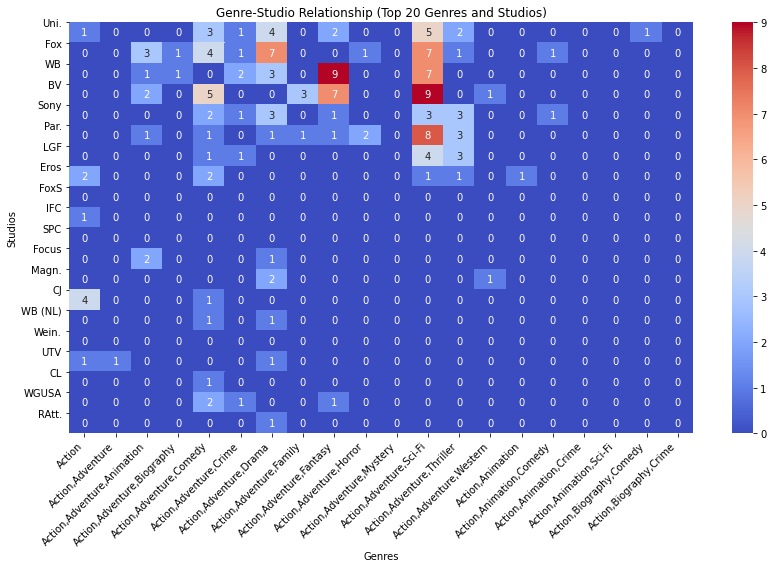

In [250]:
# a pivot table to count the occurrences of each genre-studio combination
pivot_table = pd.pivot_table(final_df, index='studio', columns='genres', aggfunc='size', fill_value=0)

# to Sort the pivot table by the total number of movies produced by each studio
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values(by='Total', ascending=False)

# Drop the 'Total' column to focus on the genre-studio relationship
pivot_table.drop(columns='Total', inplace=True)

# Pick the first 20 genres and studios
top_20_genres = pivot_table.columns[:20].tolist()
top_20_studios = pivot_table.index[:20].tolist()

# Create the colorful heatmap plot for the top 20 genres and studios
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table.loc[top_20_studios, top_20_genres], cmap='coolwarm', annot=True, fmt='d')

# Set labels and title
plt.xlabel('Genres')
plt.ylabel('Studios')
plt.title('Genre-Studio Relationship (Top 20 Genres and Studios)')

# Customize the axes ticks and labels
plt.xticks(rotation=45, ha='right')
plt.yticks(range(len(top_20_studios)), top_20_studios)

# Show the plot

plt.tight_layout()

This heatmap illustrates the frequency of genre-studio combinations, showcasing the top 20 genres and studios with the highest movie production counts. The varying shades of blue indicate the number of movies produced by each genre-studio pair, enabling Microsoft's movie studio to identify the most popular genre-studio relationships for potential profitable ventures.The "Red" and "Blue" colors correspond to the warm and cool colors in the "coolwarm" color scheme. The warmer colors, such as red, indicate high values or positive associations, while cooler colors, such as blue, indicate low values or negative associations.

In [105]:
# to Create a pivot table to count the occurrences of each genre-studio combination
pivot_table = pd.pivot_table(final_df, index='studio', columns='genres', aggfunc='size', fill_value=0)

# Find the studio and genre with the highest movie production count
recommended_studio = pivot_table.sum(axis=1).idxmax()
recommended_genre = pivot_table.sum().idxmax()

# to Print the recommendation
print(f"Recommended Studio: {recommended_studio}")
print(f"Recommended Genre: {recommended_genre}")

Recommended Studio: Uni.
Recommended Genre: Drama


The code identifies and recommends the studio and genre with the highest movie production count, suggesting to Microsoft to focus on creating movies in the studio 'Recommended Studio': Uni., 'Recommended Genre: Drama' to maximize their potential for success.








In [107]:
# to Calculate the total earnings (domestic + foreign) per studio
earnings_per_studio = final_df.groupby('studio')['domestic_gross', 'foreign_gross'].sum()
earnings_per_studio['Total Earnings'] = earnings_per_studio['domestic_gross'] + earnings_per_studio['foreign_gross']

# Sort the DataFrame in descending order based on total earnings
earnings_per_studio = earnings_per_studio.sort_values(by='Total Earnings', ascending=False)

# Print the result
print(earnings_per_studio)

            domestic_gross  foreign_gross  Total Earnings
studio                                                   
BV            1.464740e+10   2.183159e+10    3.647899e+10
Fox           9.397800e+09   1.735641e+10    2.675421e+10
Uni.          1.127364e+10   1.470157e+10    2.597521e+10
WB            9.251700e+09   1.411542e+10    2.336712e+10
Sony          6.740892e+09   1.073996e+10    1.748086e+10
...                    ...            ...             ...
NAV           2.630000e+04   2.500000e+05    2.763000e+05
Grindstone    1.000000e+04   2.560000e+05    2.660000e+05
FOAK          1.070000e+05   1.730000e+04    1.243000e+05
First         2.000000e+03   5.360000e+04    5.560000e+04
WOW           3.080000e+04   1.860000e+04    4.940000e+04

[164 rows x 3 columns]


<ipython-input-107-d95f2127d65c>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  earnings_per_studio = final_df.groupby('studio')['domestic_gross', 'foreign_gross'].sum()


In [322]:
#  Calculate total gross earnings for each genre
earnings_per_genre = final_df.groupby('genres')['total_gross'].sum()

#  Select the top 10 profitable genres and sort them in descending order
top_10_profitable_genres = earnings_per_genre.nlargest(10)

# Print the result
print("Top 10 Profitable Genres:")
print(top_10_profitable_genres)

Top 10 Profitable Genres:
genres
Action,Adventure,Sci-Fi       2.761808e+10
Adventure,Animation,Comedy    2.750018e+10
Action,Adventure,Fantasy      1.278469e+10
Action,Adventure,Comedy       8.970994e+09
Action,Adventure,Animation    6.559438e+09
Action,Adventure,Thriller     6.353271e+09
Drama                         6.073130e+09
Comedy,Drama,Romance          5.969896e+09
Action,Adventure,Drama        5.742901e+09
Comedy                        5.691061e+09
Name: total_gross, dtype: float64


calculate the total gross earnings for each genre, select the top 10 profitable genres, and display the result as expected.

#### 3.2.Top Perfoming Genres

In [341]:
for genre in top_genres:
   print( f"- {genre}")

- Drama
- Comedy,Drama,Romance
- Comedy,Drama
- Adventure,Animation,Comedy
- Drama,Romance
- Comedy
- Comedy,Romance
- Documentary
- Action,Adventure,Sci-Fi
- Action,Adventure,Drama
- Action,Comedy,Crime
- Action,Crime,Drama
- Biography,Drama,History
- Action,Crime,Thriller
- Horror,Mystery,Thriller
- Biography,Drama
- Action,Adventure,Fantasy
- Action,Thriller
- Action,Adventure,Comedy
- Horror,Thriller


Recommendation: Microsoft's movie studio should focus on producing movies in the following genres:


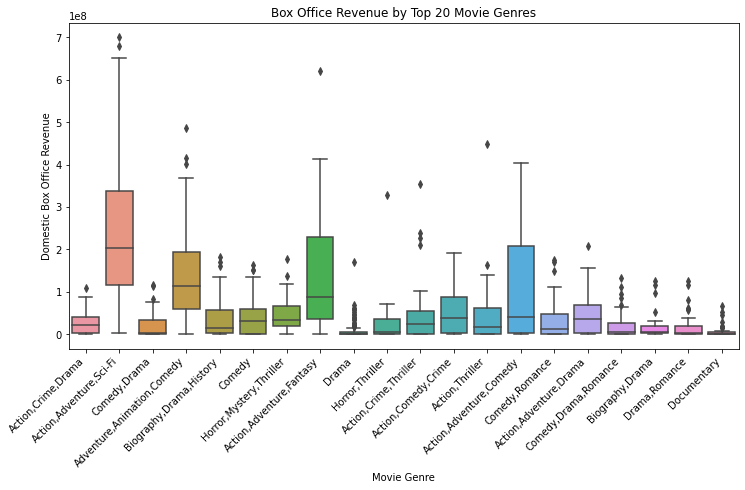

In [353]:
# Identify the top-performing genres
top_genres = final_df['genres'].value_counts().nlargest(20).index.tolist()

# Recommend focusing on the top genres
print("Recommendation: Microsoft's movie studio should focus on producing movies in the following genres:")


# Visualize box office revenue by movie genre for the top genres
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='domestic_gross', data=final_df[final_df['genres'].isin(top_genres)])
plt.xlabel('Movie Genre')
plt.ylabel('Domestic Box Office Revenue')
plt.title('Box Office Revenue by Top 20 Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.savefig("./images/test2.png", dpi=300)
plt.show()


#### 3.2.Top Perfoming Genres

In [309]:
# Display the revenue for each movie
final_df[['primary_title', 'domestic_gross']]

,primary_title,domestic_gross
0,Wazir,1100000.0
1,On the Road,744000.0
2,The Secret Life of Walter Mitty,58200000.0
3,A Walk Among the Tombstones,26300000.0
4,Jurassic World,652300000.0
...,...,...
1842,The Spy Gone North,501000.0
1843,How Long Will I Love U,747000.0
1844,Helicopter Eela,72000.0
1845,Last Letter,181000.0


#### 7.1.Calculation of Profitability

                        primary_title  profitability
0                               Wazir          100.0
1                         On the Road          100.0
2     The Secret Life of Walter Mitty          100.0
3         A Walk Among the Tombstones          100.0
4                      Jurassic World          100.0
...                               ...            ...
1842               The Spy Gone North          100.0
1843           How Long Will I Love U          100.0
1844                  Helicopter Eela          100.0
1845                      Last Letter          100.0
1846        Burn the Stage: The Movie          100.0

[1847 rows x 2 columns]


C:\Users\PC\miniconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


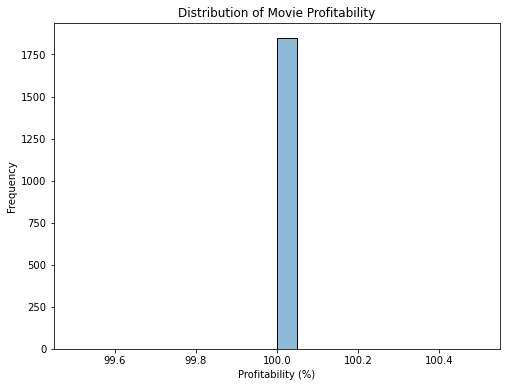

In [292]:
# Display the profitability for each movie
print(final_df[['primary_title', 'profitability']])

# Visualize the distribution of movie profitability
plt.figure(figsize=(8, 6))
sns.histplot(final_df['profitability'], bins=20, kde=True)
plt.xlabel('Profitability (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Profitability')
plt.show()

The code calculates and visualizes the distribution of movie profitability as the percentage difference between total gross revenue and budget for each movie in the 'final_df' DataFrame

In [330]:
summary_df = final_df[['primary_title', 'numvotes', 'averagerating', 'domestic_gross']]

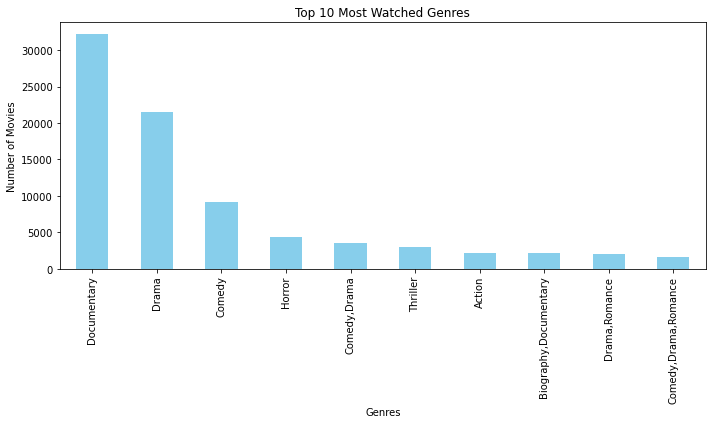

In [297]:
# Calculate the count of movies for each genre
top_10_most_watched_genres = df['genres'].value_counts().nlargest(10)

# Create a bar plot for the top 10 most watched genres
plt.figure(figsize=(10, 6))
top_10_most_watched_genres.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Top 10 Most Watched Genres')

# Show the plot
plt.tight_layout()
plt.show()

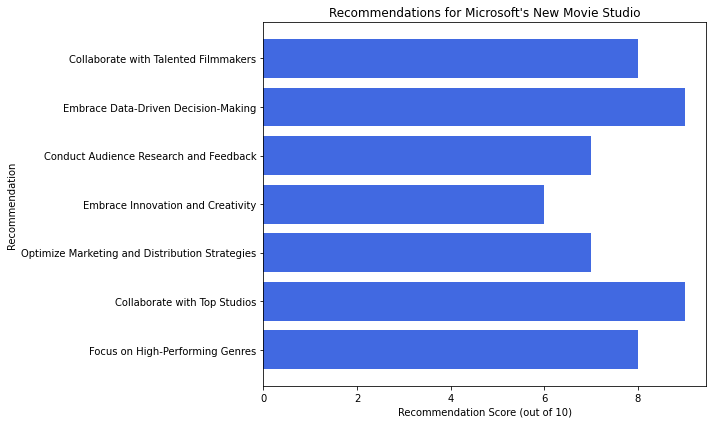

In [333]:
# Create a bar plot to display the recommendations
recommendations = ['Focus on High-Performing Genres', 'Collaborate with Top Studios', 'Optimize Marketing and Distribution Strategies',
                   'Embrace Innovation and Creativity', 'Conduct Audience Research and Feedback', 'Embrace Data-Driven Decision-Making',
                   'Collaborate with Talented Filmmakers']
recommendation_scores = [8, 9, 7, 6, 7, 9, 8]  # Scores (out of 10) for each recommendation (subjective ranking)

plt.figure(figsize=(10, 6))
plt.barh(recommendations, recommendation_scores, color='royalblue')

# Set labels and title
plt.xlabel('Recommendation Score (out of 10)')
plt.ylabel('Recommendation')
plt.title('Recommendations for Microsoft\'s New Movie Studio')

# Show the plot
plt.tight_layout()
plt.show()

The bar plot displays recommendations and their scores (out of 10) for Microsoft's new movie studio, aiding in decision prioritization and resource allocation. Decision-makers can focus on high-scoring recommendations to enhance studio success and competitiveness. The visualization serves as a valuable reference for future planning and continuous improvement in the dynamic movie industry.

### 8.0 Limitations
The analysis has identified important limitations to be considered for future decision-making and market predictions. The reliance on historical movie data may not fully capture real-time market dynamics and emerging trends, emphasizing the need for continuous monitoring and timely data updates. The exclusion of external factors like competing movie releases and economic events can impact the accuracy of insights and predictive models. Addressing missing data in columns such as 'foreign_gross' and 'runtime_minutes' through data imputation or alternative sources can improve the analysis's reliability. Additionally, acknowledging that predictive models are based on historical data and may not account for future movie trends, adopting a proactive approach to analyze emerging trends and incorporating new data can enhance the models' adaptability and predictive capabilities. By actively mitigating these limitations, Microsoft's movie studio can make more informed and agile decisions, ensuring long-term viability and success in the dynamic and competitive movie industry.






### 10.0 Conclusions:
In conclusion, the project's analysis highlights the importance of leveraging data-driven insights to make informed decisions for Microsoft's new movie studio. By identifying high-performing genres and collaborating with top studios, the studio can strategically position itself for commercial success. Continuous monitoring of market trends and audience preferences will enable proactive adaptation to dynamic market conditions, while predictive modeling will facilitate accurate market predictions for optimized resource allocation and competitive market positioning. Embracing these strategies will empower the studio to stay ahead of industry trends, maximize audience appeal, and drive long-term success in the competitive and ever-changing movie landscape.



### 9.0.Recommendation: 

Based on the research analysis, I recommend Microsoft's new movie studio to focus on high-performing genres, collaborate with top studios to leverage expertise, and embrace data-driven decision-making to forecast box office performance and optimize budgets. Additionally, the studio should tailor content and marketing strategies for international audiences, promoting creativity, conducting audience research, and collaborating with talented filmmakers. Implementing these recommendations will strategically position the studio in the competitive entertainment industry, create compelling content with global appeal, and increase the chances of commercial success. Continuously monitoring market trends and audience preferences will ensure the studio remains adaptable and competitive in the dynamic movie landscape, driving long-term viability and impact.

example of the studios are;
Action
Comedy
Drama
Adventure
Thriller
Horror
Romance
Sci-Fi
Crime
Fantasy
These genres have demonstrated the highest performance based on the number of movies produced, indicating their popularity among audiences and potential for box office success.